In [ ]:
# Data preparation for Sentiment analysis / NLP

In [3]:
tweet = '<html> bayer leverkusen goalkeeeeper bernd leno will not be #going to napoli. his agent uli ferber to bild: "I can confirm that there were negotiations with napoli, which we have broken off. napoli is not an option." Atletico madrid and Arsenal are the other strong rumours. #b04 #afc </html>'

In [80]:
# Remove HTML tags 
# Sometimes twitter response contains HTML tags and we need to remove this.
#We’ll be using Beautifulsoup package for this purpose.
# If there are not HTML tags present than it will return the same text.

In [15]:
from bs4 import BeautifulSoup
url = "https://www.packtpub.com/all-products/all-books"


In [16]:
tweet = BeautifulSoup(tweet).get_text()

In [17]:
tweet

'bayer leverkusen goalkeeeeper bernd leno will not be #going to napoli. his agent uli ferber to bild: "I can confirm that there were negotiations with napoli, which we have broken off. napoli is not an option." Atletico madrid and Arsenal are the other strong rumours. #b04 #afc '

In [14]:
BeautifulSoup

bs4.BeautifulSoup

In [18]:
# Remove hashtags

In [20]:
import re
tweet = ' '.join(re.sub("(@[A-Za-z0-9]+)|(#[A-Za-z0-9]+)", " ", tweet).split())

In [21]:
tweet

'bayer leverkusen goalkeeeeper bernd leno will not be to napoli. his agent uli ferber to bild: "I can confirm that there were negotiations with napoli, which we have broken off. napoli is not an option." Atletico madrid and Arsenal are the other strong rumours.'

In [22]:
# Remove URLs

In [23]:
tweet = ' '.join(re.sub("(\w+:\/\/\S+)", " ", tweet).split())

In [24]:
tweet

'bayer leverkusen goalkeeeeper bernd leno will not be to napoli. his agent uli ferber to bild: "I can confirm that there were negotiations with napoli, which we have broken off. napoli is not an option." Atletico madrid and Arsenal are the other strong rumours.'

In [25]:
# Remove punctuations
# Replacing all the punctuations such as .,!?:;-= with space.

In [27]:
tweet = ' '.join(re.sub("[\.\,\!\?\:\;\-\=]", " ", tweet).split())
tweet

'bayer leverkusen goalkeeeeper bernd leno will not be to napoli his agent uli ferber to bild "I can confirm that there were negotiations with napoli which we have broken off napoli is not an option " Atletico madrid and Arsenal are the other strong rumours'

In [28]:
tweet

'bayer leverkusen goalkeeeeper bernd leno will not be to napoli his agent uli ferber to bild "I can confirm that there were negotiations with napoli which we have broken off napoli is not an option " Atletico madrid and Arsenal are the other strong rumours'

In [29]:
# Lower case
# To avoid case sensitive issue

In [31]:
tweet = tweet.lower()
tweet

'bayer leverkusen goalkeeeeper bernd leno will not be to napoli his agent uli ferber to bild "i can confirm that there were negotiations with napoli which we have broken off napoli is not an option " atletico madrid and arsenal are the other strong rumours'

In [38]:
# Replace contractions
# Remove contractions and translate into appropriate slang. There is no universal list to replace contractions
# so we have made it for our purpose.

CONTRACTIONS = {"mayn't":"may not", "may've":"may have"}
tweet = tweet.replace("’","'")
words = tweet.split()
reformed = [CONTRACTIONS[word] if word in CONTRACTIONS else word for word in words]
tweet = " ".join(reformed)

In [39]:
tweet

'bayer leverkusen goalkeeeeper bernd leno will not be to napoli his agent uli ferber to bild "i can confirm that there were negotiations with napoli which we have broken off napoli is not an option " atletico madrid and arsenal are the other strong rumours'

In [37]:
# Fix misspelled words
# Here we are not actually building any complex function to correct the misspelled words but just checking that 
# each character should occur not more than 2 times in every word. It’s a very basic misspelling check.

In [41]:
import itertools
tweet = ''.join(''.join(s)[:2] for _, s in itertools.groupby(tweet))
tweet

'bayer leverkusen goalkeeper bernd leno will not be to napoli his agent uli ferber to bild "i can confirm that there were negotiations with napoli which we have broken off napoli is not an option " atletico madrid and arsenal are the other strong rumours'

In [42]:
# Replace emojis or emoticons
# As emojis and emoticons play a significant role in expressing the sentiments we need to replace them with 
# the expression they represent in plain English.
# For emojis, we’ll be using emoji package and for emoticons, we’ll be building our own dictionary.

In [48]:
SMILEY = {":‑(":"sad", ":‑)":"smiley"}
words = tweet.split()
reformed = [SMILEY[word] if word in SMILEY else word for word in words]
tweet = " ".join(reformed)

In [46]:
import re

text = u'This dog \U0001f602'
print(text) # with emoji

emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)
print(emoji_pattern.sub(r'', text)) # no emoji

This dog 😂
This dog 


In [49]:
# For emojis
#Emoji package return values for given emoji as :flushed_face: so we need to remove : from a given output.import emoji 

In [52]:
pip install emoji

  Stored in directory: C:\Users\Eshwar\AppData\Local\pip\Cache\wheels\86\09\26\f944015841423cd516e8a97f30e29be59e53461aea8b7d3458
Successfully built emoji
Note: you may need to restart the kernel to use updated packages.


In [53]:
import emoji 
tweet = emoji.demojize(tweet)
tweet = tweet.replace(":"," ")
tweet = ' '.join(tweet.split())

#https://sentiment-analysis-using-fasttext-9ccd04465597

In [59]:
# this is an example to see how emoji of thumbs-up works.
tweet1 = ' this is emoji example... for the fixes 👍'
tweet1 = emoji.demojize(tweet1)
tweet1 = tweet1.replace(":"," ")
tweet1 = ' '.join(tweet1.split())
tweet1

'this is emoji example... for the fixes thumbs_up'

In [60]:
# NLTK library
# Removing stop words is an efficient way while cleaning data
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [69]:
# Formatting the Dataset
# Need to format the data in which fastText requires for supervised learning.

# FastText assumes the labels are words that are prefixed by the string __label__.
# __label__NEUTRAL  'm just fine i have your fanbase angry over
# __label__POSITIVE 'what a weekend of football results & hearts

In [1]:
# We can format our data using
def transform_instance(row):
    cur_row = []
    #Prefix the index-ed label with __label__
    label = "__label__" + row[4]  
    cur_row.append(label)
    cur_row.extend(nltk.word_tokenize(tweet_cleaning_for_sentiment_analysis(row[2].lower())))
    return cur_row
def preprocess(input_file, output_file):
    i=0
    with open(output_file, 'w') as csvoutfile:
        csv_writer = csv.writer(csvoutfile, delimiter=' ', lineterminator='\n')
        with open(input_file, 'r', newline='', encoding='latin1') as csvinfile: # encoding='latin1'
            csv_reader = csv.reader(csvinfile, delimiter=',', quotechar='"')
            for row in csv_reader:
                if row[4]!="MIXED" and row[4].upper() in ['POSITIVE','NEGATIVE','NEUTRAL'] and row[2]!='':
                    row_output = transform_instance(row)
                    csv_writer.writerow(row_output )
                    # print(row_output)
                i=i+1
                if i%10000 ==0:
                    print(i)

In [72]:
import nltk
nltk.word_tokenize('hello world!')

['hello', 'world', '!']

In [73]:
# Upsampling the dataset
# In our dataset data is not equally divided into different labels. 
# It contains around 72% of data in the neutral label. So, we can see that our model will tend to be 
# overwhelmed by the large class and ignore the small ones.

In [3]:
# https://towardsdatascience.com/twitter-sentiment-analysis-using-fasttext-9ccd04465597
# https://www.kaggle.com/crowdflower/twitter-airline-sentiment/downloads/twitter-airline-sentiment.zip/2


In [13]:
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
import pandas
from sklearn.model_selection import train_test_split
import numpy

In [14]:
Tweet= pandas.read_csv("E:/SentimentAnalysis/Tweets.csv")
Tweet.head(2)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)


In [15]:
(len(Tweet)-Tweet.count())/len(Tweet)

tweet_id                        0.000000
airline_sentiment               0.000000
airline_sentiment_confidence    0.000000
negativereason                  0.373087
negativereason_confidence       0.281284
airline                         0.000000
airline_sentiment_gold          0.997268
name                            0.000000
negativereason_gold             0.997814
retweet_count                   0.000000
text                            0.000000
tweet_coord                     0.930396
tweet_created                   0.000000
tweet_location                  0.323292
user_timezone                   0.329235
dtype: float64

In [11]:
del Tweet['tweet_coord']
del Tweet['airline_sentiment_gold']
del Tweet['negativereason_gold']

In [16]:
(len(Tweet)-Tweet.count())/len(Tweet)

tweet_id                        0.000000
airline_sentiment               0.000000
airline_sentiment_confidence    0.000000
negativereason                  0.373087
negativereason_confidence       0.281284
airline                         0.000000
airline_sentiment_gold          0.997268
name                            0.000000
negativereason_gold             0.997814
retweet_count                   0.000000
text                            0.000000
tweet_coord                     0.930396
tweet_created                   0.000000
tweet_location                  0.323292
user_timezone                   0.329235
dtype: float64

In [17]:
Mood_count=Tweet['airline_sentiment'].value_counts()

Text(0.5, 1.0, 'Count of Moods')

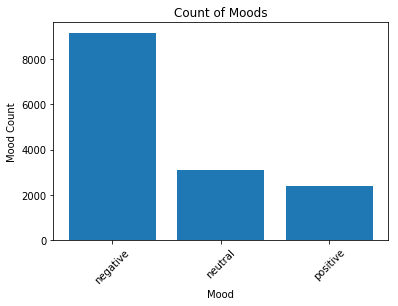

In [18]:
Index = [1,2,3]
plt.bar(Index,Mood_count)
plt.xticks(Index,['negative','neutral','positive'],rotation=45)
plt.ylabel('Mood Count')
plt.xlabel('Mood')
plt.title('Count of Moods')

In [19]:
Mood_count

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

In [20]:
Tweet['airline'].value_counts()

United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64

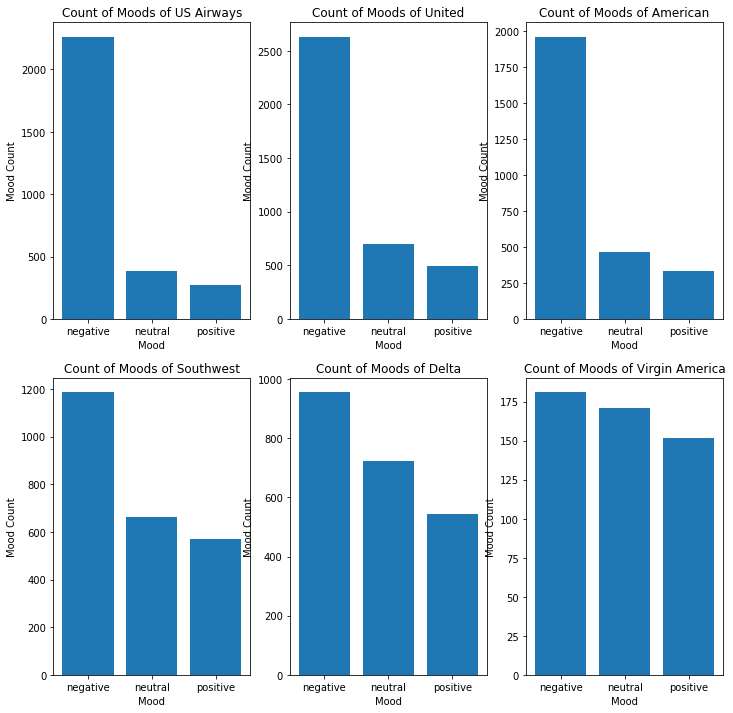

In [21]:
def plot_sub_sentiment(Airline):
    df=Tweet[Tweet['airline']==Airline]
    count=df['airline_sentiment'].value_counts()
    Index = [1,2,3]
    plt.bar(Index,count)
    plt.xticks(Index,['negative','neutral','positive'])
    plt.ylabel('Mood Count')
    plt.xlabel('Mood')
    plt.title('Count of Moods of '+Airline)
plt.figure(1,figsize=(12, 12))
plt.subplot(231)
plot_sub_sentiment('US Airways')
plt.subplot(232)
plot_sub_sentiment('United')
plt.subplot(233)
plot_sub_sentiment('American')
plt.subplot(234)
plot_sub_sentiment('Southwest')
plt.subplot(235)
plot_sub_sentiment('Delta')
plt.subplot(236)
plot_sub_sentiment('Virgin America')

In [22]:
# From the above plots one can find that the distribution of moods for the first three airlines are always skewed 
# toward negative moods. On contrary, # the moods are distributed more balanced with the later three airline companies.

In [69]:
NR_Count=dict(Tweet['negativereason'].value_counts(sort=True))

In [70]:
NR_Count

{'Customer Service Issue': 2910,
 'Late Flight': 1665,
 "Can't Tell": 1190,
 'Cancelled Flight': 847,
 'Lost Luggage': 724,
 'Bad Flight': 580,
 'Flight Booking Problems': 529,
 'Flight Attendant Complaints': 481,
 'longlines': 178,
 'Damaged Luggage': 74}

In [30]:
def NR_Count(Airline):
    if Airline=='All':
        df=Tweet
    else:
        df=Tweet[Tweet['airline']==Airline]
    count=dict(df['negativereason'].value_counts())
    Unique_reason=list(Tweet['negativereason'].unique())
    Unique_reason=[x for x in Unique_reason if str(x) != 'nan']
    Reason_frame=pandas.DataFrame({'Reasons':Unique_reason})
    Reason_frame['count']=Reason_frame['Reasons'].apply(lambda x: count[x])
    return Reason_frame

In [31]:
def plot_reason(Airline):
    df=NR_Count(Airline)
    count=df['count']
    Index = range(1,(len(df)+1))
    plt.bar(Index,count)
    plt.xticks(Index,df['Reasons'],rotation=90)
    plt.ylabel('Count')
    plt.xlabel('Reason')
    plt.title('Count of Reasons for '+Airline)

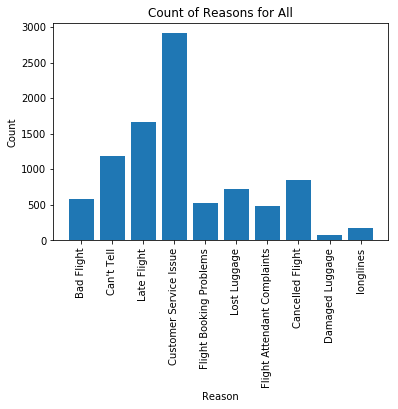

In [32]:
plot_reason('All')

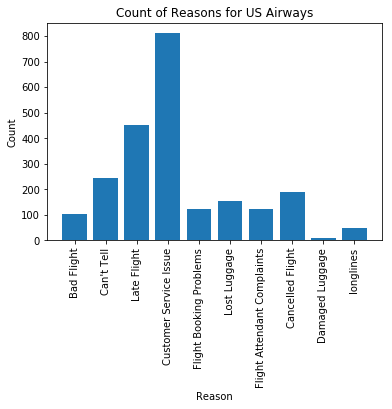

In [33]:
plot_reason('US Airways')

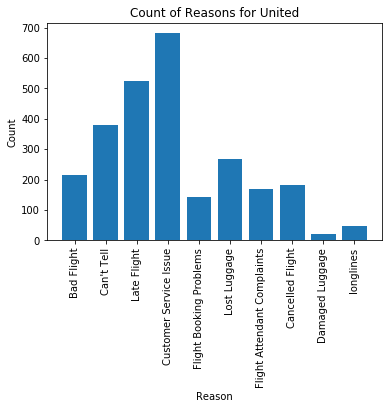

In [34]:
plot_reason('United')

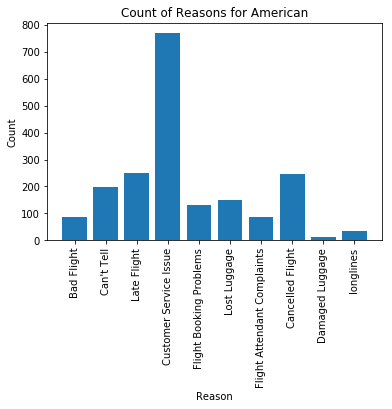

In [35]:
plot_reason('American')

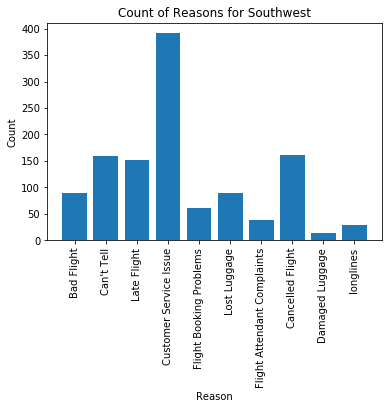

In [36]:
plot_reason('Southwest')

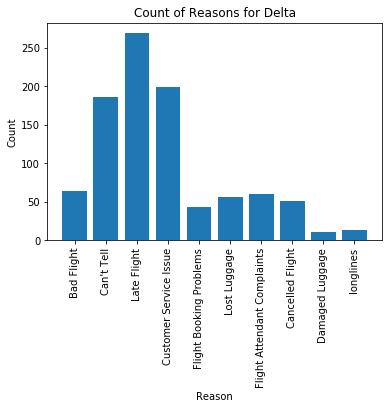

In [37]:
plot_reason('Delta')

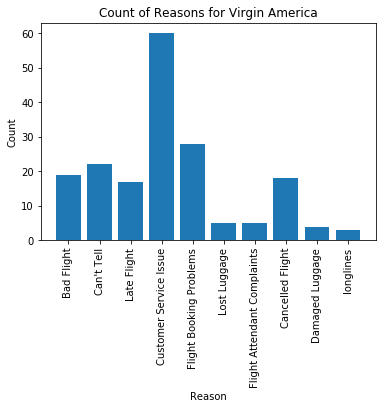

In [38]:
plot_reason('Virgin America')

In [40]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [41]:
from wordcloud import WordCloud,STOPWORDS

In [42]:
df=Tweet[Tweet['airline_sentiment']=='negative']
words = ' '.join(df['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])

In [43]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)

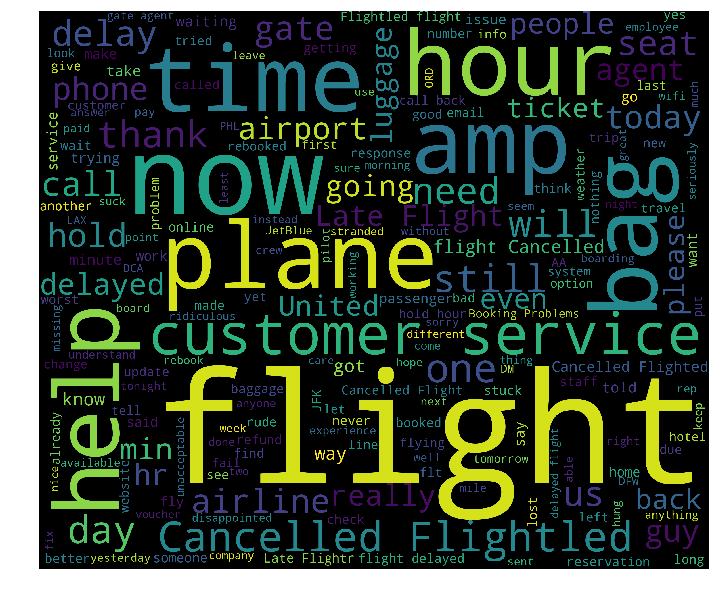

In [44]:
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [45]:
# We can find that the Tweets with negative moods are frequently involved some words 
# like cancelled, flight ,customer or hour. People might guess that customer tends to complain when 
# they are waiting for the delayed flights.

In [46]:
# E: Preprocess data for classification

In [47]:
# Our data exploration ends up at here. The next step will be preprocess the data in order to make 
# the learning process more smooth.

In [48]:
import re
import nltk
from nltk.corpus import stopwords

In [49]:
def tweet_to_words(raw_tweet):
    letters_only = re.sub("[^a-zA-Z]", " ",raw_tweet) 
    words = letters_only.lower().split()                             
    stops = set(stopwords.words("english"))                  
    meaningful_words = [w for w in words if not w in stops] 
    return( " ".join( meaningful_words )) 

In [50]:
def clean_tweet_length(raw_tweet):
    letters_only = re.sub("[^a-zA-Z]", " ",raw_tweet) 
    words = letters_only.lower().split()                             
    stops = set(stopwords.words("english"))                  
    meaningful_words = [w for w in words if not w in stops] 
    return(len(meaningful_words)) 

In [ ]:
# Python allows you to create anonymous function i.e function having no names using a facility called lambda function.
# lambda functions are small functions usually not more than a line. It can have any number of arguments just like 
# a normal function. The body of lambda functions is very small and consists of only one expression. 
# The result of the expression is the value when the lambda is applied to an argument. Also there is no need 
# for any return statement in lambda function.

In [51]:
Tweet['sentiment']=Tweet['airline_sentiment'].apply(lambda x: 0 if x=='negative' else 1)

In [52]:
Tweet['clean_tweet']=Tweet['text'].apply(lambda x: tweet_to_words(x))
Tweet['Tweet_length']=Tweet['text'].apply(lambda x: clean_tweet_length(x))
train,test = train_test_split(Tweet,test_size=0.2,random_state=42)

In [53]:
train_clean_tweet=[]
for tweet in train['clean_tweet']:
    train_clean_tweet.append(tweet)
test_clean_tweet=[]
for tweet in test['clean_tweet']:
    test_clean_tweet.append(tweet)

In [54]:
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer(analyzer = "word")
train_features= v.fit_transform(train_clean_tweet)
test_features=v.transform(test_clean_tweet)

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score

In [56]:
Classifiers = [
    LogisticRegression(C=0.000000001,solver='liblinear',max_iter=200),
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.025, probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=200),
    AdaBoostClassifier(),
    GaussianNB()]

In [57]:
dense_features=train_features.toarray()
dense_test= test_features.toarray()
Accuracy=[]
Model=[]
for classifier in Classifiers:
    try:
        fit = classifier.fit(train_features,train['sentiment'])
        pred = fit.predict(test_features)
    except Exception:
        fit = classifier.fit(dense_features,train['sentiment'])
        pred = fit.predict(dense_test)
    accuracy = accuracy_score(pred,test['sentiment'])
    Accuracy.append(accuracy)
    Model.append(classifier.__class__.__name__)
    print('Accuracy of '+classifier.__class__.__name__+'is '+str(accuracy))

Accuracy of LogisticRegressionis 0.6451502732240437
Accuracy of KNeighborsClassifieris 0.5891393442622951


C:\Users\Eshwar\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy of SVCis 0.6451502732240437
Accuracy of DecisionTreeClassifieris 0.7578551912568307
Accuracy of RandomForestClassifieris 0.8145491803278688
Accuracy of AdaBoostClassifieris 0.7855191256830601
Accuracy of GaussianNBis 0.5724043715846995


Text(0.5, 1.0, 'Accuracies of Models')

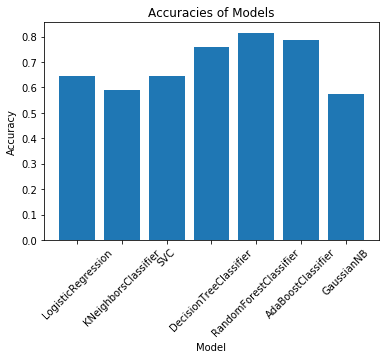

In [58]:
#Complare the model performance:
    
Index = [1,2,3,4,5,6,7]
plt.bar(Index,Accuracy)
plt.xticks(Index, Model,rotation=45)
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.title('Accuracies of Models')

In [59]:
# Random Forest gave the accuracy of 0.8145491803278688
# https://www.kaggle.com/jiashenliu/how-can-we-predict-the-sentiment-by-tweets

In [77]:
train.head(3)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,sentiment,clean_tweet,Tweet_length
750,570101670882840576,negative,0.6737,Can't Tell,0.6737,United,NaN,kbleggett,NaN,0,@united you are offering us 8 rooms for 32 peo...,NaN,2015-02-23 22:03:24 -0800,"Ottawa, Canada",Eastern Time (US & Canada),0,united offering us rooms people fail,6
6875,570073592848715776,negative,0.6757,Can't Tell,0.3515,Delta,NaN,empiricalco,NaN,0,@JetBlue JFK NYC staff is amazing. The #lax Je...,NaN,2015-02-23 20:11:50 -0800,22nd Century,Pacific Time (US & Canada),0,jetblue jfk nyc staff amazing lax jetblue send...,13
7598,569516908195815425,positive,0.6671,NaN,0.0000,Delta,NaN,djkeating13,NaN,0,"@JetBlue well, the last update was in the righ...",NaN,2015-02-22 07:19:46 -0800,"Malden, MA",Eastern Time (US & Canada),1,jetblue well last update right direction least...,10


In [78]:
test.head(2)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,sentiment,clean_tweet,Tweet_length
4794,569731104070115329,positive,1.0,NaN,NaN,Southwest,NaN,JasmineDT,NaN,1,@SouthwestAir you're my early frontrunner for ...,NaN,2015-02-22 21:30:54 -0800,Washington D.C.,Eastern Time (US & Canada),1,southwestair early frontrunner best airline os...,6
10480,569263373092823040,negative,1.0,Cancelled Flight,1.0,US Airways,NaN,ElizabethFrayer,NaN,0,@USAirways how is it that my flt to EWR was Ca...,NaN,2015-02-21 14:32:19 -0800,NaN,NaN,0,usairways flt ewr cancelled flightled yet flts...,11


In [87]:
test_clean_tweet[:5]

['southwestair early frontrunner best airline oscars',
 'usairways flt ewr cancelled flightled yet flts nyc usairways still flying',
 'jetblue going bdl dca flights yesterday today every single one getting delayed',
 'jetblue depart washington c',
 'jetblue probably find ticket']